**ICT619 Artificial Intelligence Assignment and Project - EUR/USD Prediction Model**  

*   34165578 CHOW KUM SIONG (PAUL) 
*   34298294 NYAN WIN MYINT

In [1]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major == 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [2]:
# TensorFlow and tf.keras
#print("Installing dependencies for Colab environment")
#!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os, re, time, json
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

c:\users\greyw\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version: 2.8.0


In [3]:
#from io import StringIO
import requests
import json
import pandas as pd
import numpy as np
import types


# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1KwyaeNvkGAVM7w6qGbedgFSlgZTu1hvG'

fluff, id = link.split('=')
print (id) # Verify that id after '='

In [4]:
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('220524-220607_EURUSD_historical_data.csv')  
df_EURUSD = pd.read_csv('220524-220607_EURUSD_historical_data.csv')

In [5]:
df_EURUSD = df_EURUSD[df_EURUSD.CLOSE != "."]
print(df_EURUSD.shape)
df_EURUSD.head(20)

(932, 5)


,DATE_TIME,HIGH,LOW,OPEN,CLOSE
0,5/24/2022 7:15,1.07325,1.07162,1.07238,1.07236
1,5/24/2022 7:30,1.07345,1.07196,1.07240,1.07337
2,5/24/2022 7:45,1.07362,1.07248,1.07338,1.07309
3,5/24/2022 8:00,1.07336,1.07167,1.07306,1.07183
4,5/24/2022 8:15,1.07184,1.07055,1.07181,1.07121
5,5/24/2022 8:30,1.07154,1.07012,1.07115,1.07051
6,5/24/2022 8:45,1.07178,1.07033,1.07051,1.07046
7,5/24/2022 9:00,1.07152,1.07042,1.07047,1.07144
8,5/24/2022 9:15,1.07193,1.07138,1.07148,1.07144
9,5/24/2022 9:30,1.07150,1.07054,1.07147,1.07085


In [6]:
df_EURUSD.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HIGH,932.0,1.072236,0.003150,1.06451,1.070298,1.072620,1.074505,1.07867
LOW,932.0,1.071472,0.003232,1.06275,1.069380,1.071885,1.073547,1.07837
OPEN,932.0,1.071858,0.003199,1.06284,1.069850,1.072285,1.074012,1.07862
CLOSE,932.0,1.071858,0.003198,1.06281,1.069835,1.072280,1.074012,1.07865


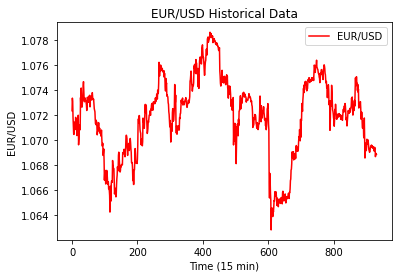

In [7]:
import matplotlib.pyplot as plt
df_EURUSD_plot = df_EURUSD.iloc[:,1:2].values.astype(float)
# Visualising the Data
plt.plot(df_EURUSD.CLOSE, color = 'red', label = 'EUR/USD')
plt.title('EUR/USD Historical Data')
plt.xlabel('Time (15 min)')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [8]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

In [9]:
# defining the batch size and number of epochs
# timesteps must be well within the number of entries in the dataset
# try reduce the no of epochs at later stage
#default parameters to start with:
#batch_size = 64
#epochs = 10
#timesteps = 20

batch_size = 10
epochs = 300
timesteps = 5

<h1> Batch-size and trainings-set size </h1>

With stateful LSTMs the trainings-set size must be divisible without remainder by the batch-size (modulo = 0)

In [10]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [11]:
length = get_train_length(df_EURUSD, batch_size, 0.1)
print(length)

740
750
760
770
780
790
800
810
820
830
830


If timesteps is 5, the LSTM has learned from 5 timesteps then predicts the next 5 timesteps in the future, the whole sliding window slides one timestep to the right, and the whole procedure restarts. In this case, the timestep = 5, where T-5 = current 15-min window.

In [12]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_EURUSD_train = df_EURUSD[0:upper_train]
training_set = df_EURUSD_train.iloc[:,1:2].values
training_set.shape

(840, 1)

In [13]:
# Feature Scaling
#scale between 0 and 1. the weights are easier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(840, 1)

1. Input our data in the form of a 3D array to the LSTM model. 
2. Create data in 5 timesteps before using numpy to convert it into an array. 

In [14]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len(y_train))
#create X_train matrix
#5 items per array (timestep) 
print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#5 items per array (timestep) 
print(y_train[0:2])
print(np.array(y_train).shape)

835
830
830
[array([0.61723164, 0.63135593, 0.64336158, 0.625     , 0.51765537]), array([0.63135593, 0.64336158, 0.625     , 0.51765537, 0.49646893])]
(830, 5)
[array([0.49646893, 0.51341808, 0.4950565 , 0.5240113 , 0.49364407]), array([0.51341808, 0.4950565 , 0.5240113 , 0.49364407, 0.47951977])]
(830, 5)


3.Convert the data into a 3D array with X_train samples, 5 timestamps, and one feature at each step.

In [15]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(830, 5, 1)
(830, 5, 1)


In [16]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

The LSTM layer is added with the following arguments: 10 units is the dimensionality of the output space, return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_1_mae is the shape of the training dataset. Compiled our model using the Adam optimizer and set MAE as loss function. 

In [17]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
#each layer is the input of the next layer
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

#adam is fast starting off and then gets slower and more precise
#mae -> mean absolute error loss function
regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(10, 5, 1)]              0         
                                                                 
 lstm (LSTM)                 (10, 5, 10)               480       
                                                                 
 lstm_1 (LSTM)               (10, 5, 10)               840       
                                                                 
 dense (Dense)               (10, 5, 1)                11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [18]:
import tensorflow as tf
from keras import backend as K

K.set_session(K.tf.compat.v1.Session(config=K.tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

To decide how to handle the memory each LSTM Cell has :

input (what to let in),
forget (what to forget) and
output (what to write to the output) LSTM Cell State is its memory LSTM Hidden State is equivalent to the Cell output: lstm_hidden_state_size (number of neurons = memory cells) = lstm_outputs_size Parameters:
weights for the inputs (lstm_inputs_size)
weights for the outputs (lstm_outputs_size)
bias variable Result from previous point - for all 3 Gates and for Cell State ( = 4)

\begin{equation}
\textbf{PARAMETERS} = \textbf4 \times \textbf{ LSTM outputs size} \times (\textbf{weights LSTM inputs size} + \textbf{weights LSTM outputs size} + 1 \textbf{ bias variable}) \end{equation}

In [19]:
# 1st LSTM Layer
parameters = 4 * 10 * (1 + 10 + 1)
print(parameters)

480


In [20]:
parameters = 4 * 10 * (10 + 10 + 1)
print(parameters)

840


Fitted the model to run for 300 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 10.

In [21]:
#save model
import h5py
regressor_mae.save(filepath="EURUSD_with_mae_30_ts.h5")

In [22]:
#Stateful
for i in range(epochs):
    print("Epoch: " + str(i))
    #run through all data but the cell, hidden state are used for the next batch.
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    #resets only the states but the weights, cell and hidden are kept.
    regressor_mae.reset_states()
    
#Stateless
#between the batches the cell and hidden states are lost.
#regressor_mae.fit(X_train, y_train, shuffle=False, epochs = epochs, batch_size = batch_size)

Epoch: 0
83/83 [==============================] - 4s 4ms/step - loss: 0.2562
Epoch: 1
83/83 [==============================] - 0s 4ms/step - loss: 0.1713
Epoch: 2
83/83 [==============================] - 1s 7ms/step - loss: 0.1586
Epoch: 3
83/83 [==============================] - 0s 5ms/step - loss: 0.1504
Epoch: 4
83/83 [==============================] - 0s 5ms/step - loss: 0.1417
Epoch: 5
83/83 [==============================] - 0s 5ms/step - loss: 0.1300
Epoch: 6
83/83 [==============================] - 0s 5ms/step - loss: 0.1180
Epoch: 7
83/83 [==============================] - 0s 4ms/step - loss: 0.1087
Epoch: 8
83/83 [==============================] - 0s 5ms/step - loss: 0.1009
Epoch: 9
83/83 [==============================] - 0s 4ms/step - loss: 0.0969
Epoch: 10
83/83 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch: 11
83/83 [==============================] - 0s 5ms/step - loss: 0.0909
Epoch: 12
83/83 [==============================] - 0s 4ms/step - loss: 0.0

In [23]:
#load model
import h5py
regressor_mae = load_model(filepath="EURUSD_with_mae_30_ts.h5")

In [24]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [25]:
test_length = get_test_length(df_EURUSD, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
920
80


In [26]:
print(upper_train, upper_test, len(df_EURUSD))

840 930 932


In [27]:
# construct test set

#subsetting
df_EURUSD_test = df_EURUSD[upper_train:upper_test] 
test_set = df_EURUSD_test.iloc[:,1:2].values

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)

#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
#print(X_test)
X_test.shape

(80, 5, 1)

In [29]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)
#print(y_test)

(80, 5, 1)
(80, 5)
(75, 1)


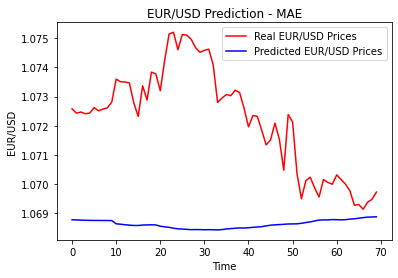

In [30]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted EUR/USD Prices')
plt.title('EUR/USD Prediction - MAE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [31]:
#MSE (mean squared error)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps]))
print(rmse)

0.0040569393434274886


In [32]:
#MAE (mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])
print(mae)

0.003602201119014186


In [33]:
# Initialising the LSTM Model with MSE Loss Function

inputs_1_mse = Input(batch_shape=(batch_size,timesteps,1))
lstm_1_mse = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mse)
lstm_2_mse = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mse)

output_1_mse = Dense(units = 1)(lstm_2_mse)

regressor_mse = Model(inputs=inputs_1_mse, outputs = output_1_mse)

#mse -> mean squared error as loss function
regressor_mse.compile(optimizer='adam', loss = 'mse')
regressor_mse.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(10, 5, 1)]              0         
                                                                 
 lstm_2 (LSTM)               (10, 5, 10)               480       
                                                                 
 lstm_3 (LSTM)               (10, 5, 10)               840       
                                                                 
 dense_1 (Dense)             (10, 5, 1)                11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [34]:
import tensorflow as tf
from keras import backend as K

K.set_session(K.tf.compat.v1.Session(config=K.tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

In [35]:
epochs = 300
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mse.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mse.reset_states()

Epoch: 0
83/83 [==============================] - 4s 5ms/step - loss: 0.0450
Epoch: 1
83/83 [==============================] - 0s 5ms/step - loss: 0.0330
Epoch: 2
83/83 [==============================] - 0s 5ms/step - loss: 0.0276
Epoch: 3
83/83 [==============================] - 0s 5ms/step - loss: 0.0249
Epoch: 4
83/83 [==============================] - 0s 5ms/step - loss: 0.0228
Epoch: 5
83/83 [==============================] - 0s 5ms/step - loss: 0.0211
Epoch: 6
83/83 [==============================] - 0s 5ms/step - loss: 0.0197
Epoch: 7
83/83 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch: 8
83/83 [==============================] - 0s 5ms/step - loss: 0.0175
Epoch: 9
83/83 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch: 10
83/83 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch: 11
83/83 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch: 12
83/83 [==============================] - 0s 5ms/step - loss: 0.0

In [36]:
import h5py
regressor_mse.save(filepath="EURUSD_with_mse_30_ts.h5")

In [37]:
regressor_mse = load_model(filepath="EURUSD_with_mse_30_ts.h5")

In [38]:
predicted_bcg_values_test_mse = regressor_mse.predict(X_test, batch_size=batch_size)
regressor_mse.reset_states()

predicted_bcg_values_test_mse = np.reshape(predicted_bcg_values_test_mse, 
                                       (predicted_bcg_values_test_mse.shape[0], 
                                        predicted_bcg_values_test_mse.shape[1]))
predicted_bcg_values_test_mse = sc.inverse_transform(predicted_bcg_values_test_mse)

pred_mse = []

for j in range(0, testset_length - timesteps):
    pred_mse = np.append(pred_mse, predicted_bcg_values_test_mse[j, timesteps-1])

pred_mse = np.reshape(pred_mse, (pred_mse.shape[0], 1))

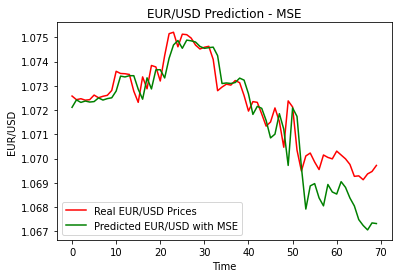

In [39]:
# Visualising the results
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted EUR/USD with MSE')
plt.title('EUR/USD Prediction - MSE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps]))
print(rmse)

0.0009967059637717593


In [41]:
mean = np.mean(np.float64(test_set[timesteps:len(pred_mse)]))
print(mean)

1.0722227142857144


In [42]:
rmse/mean * 100

0.09295699023087174

In [43]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(pred_mse)], pred_mse[0:len(pred_mse) - timesteps])
print(mae)

0.0007169133126395032


In [44]:
mae/mean * 100

0.0668623508052701

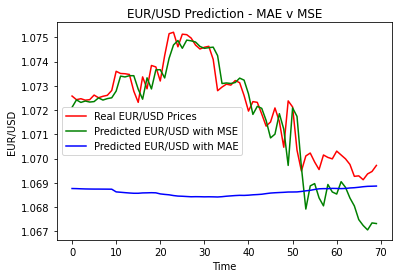

In [45]:
import matplotlib.pyplot as plt
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted EUR/USD with MSE')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted EUR/USD with MAE')
plt.title('EUR/USD Prediction - MAE v MSE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

## Next: Create and deploy a model endpoint


In [46]:
#Dependencies that only need to be installed once
#!pip install yfinance
#!pip install prophet 
#!pip install streamlit

In [62]:
%%writefile main.py
#!pip install yfinance
#!pip install prophet 
#!pip install streamlit
import json
import pandas as pd
import numpy as np
import types
import streamlit as st
from datetime import date
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go
import tensorflow as tf
from tensorflow import keras
from PIL import Image

START = "2021-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

image = Image.open("ForPredx.png")
st.image(image)
st.title("ForPredx App")

stocks = ("EURUSD=X", "GBPUSD=X","SGDUSD=X")
selected_stocks= st.selectbox("Select currency pair to predict", stocks)

#n_years = st.slider("Years of prediction:", 1, 4)
#period = n_years*365

#@st.cache
def load_data(ticker):
    data= yf.download(ticker,START, TODAY)
    data.reset_index(inplace=True)
    return data

data_load_state= st.text("Loading in progress...")
data = load_data(selected_stocks)
data_load_state.text("Loading complete!")

st.subheader('Latest market data for the last 5 days')
st.write(data.tail())

def plot_raw_data():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name='price_open'))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='price_close'))
    fig.layout.update(title_text="Current year trend since 2021", xaxis_rangeslider_visible=False)
    st.plotly_chart(fig)

plot_raw_data()

#####################################################################################################################
#Forecasting with Prophet

#df_train=data[['Date','Close']]
#df_train=df_train.rename(columns={"Date":"ds","Close":"y"})

#m = Prophet()
#m.fit(df_train)
#future=m.make_future_dataframe(periods=period)
#forecast=m.predict(future)

#st.subheader('Forecast data using Prophet')
#st.write(forecast.tail())

#st.write('Forecast Data using Prophet')
#fig1=plot_plotly(m, forecast)
#st.plotly_chart(fig1)

#st.write('forecast components from Prophet')
#fig2=m.plot_components(forecast)
#st.write(fig2)

#####################################################################################################################
#####################################################################################################################
#Forecast with ForPredx
#df_EURUSD = pd.read_csv("220524-220607_EURUSD_historical_data.csv")
#df_EURUSD = df_EURUSD[df_EURUSD.CLOSE != "."]

from datetime import date
import math

d0 = date(2021, 1, 1)
d1 = date.today()

delta = d1 - d0

df_EURUSD=data[data.Close !="."] 
df_EURUSD= np.reshape(df_EURUSD,((round(delta.days/1.398)+1), 7))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import load_model

batch_size = 10
epochs = 300
timesteps = 5

def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

length = get_train_length(df_EURUSD, batch_size, 0.1)
#print(length)

#Adding timesteps * 2
upper_train = length + timesteps*2
df_EURUSD_train = df_EURUSD[0:upper_train]
training_set = df_EURUSD_train
training_set = df_EURUSD_train.iloc[:,1:2].values
#training_set.shape

# Feature Scaling
#scale between 0 and 1. the weights are easier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
#training_set_scaled.shape

X_train = []
y_train = []

# Creating a data structure with n timesteps

#print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

#print(len(X_train))
#print(len(y_train))

#create X_train matrix
#5 items per array (timestep) 
print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#5 items per array (timestep) 
#print(y_train[0:2])
#print(np.array(y_train).shape)

# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
#print(X_train.shape)
#print(y_train.shape)

# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

# Initialising the LSTM Model with MSE Loss Function

inputs_1_mse = Input(batch_shape=(batch_size,timesteps,1))
lstm_1_mse = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mse)
lstm_2_mse = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mse)

output_1_mse = Dense(units = 1)(lstm_2_mse)

regressor_mse = Model(inputs=inputs_1_mse, outputs = output_1_mse)

#mse -> mean squared error as loss function
regressor_mse.compile(optimizer='adam', loss = 'mse')
regressor_mse.summary()

import tensorflow as tf
from keras import backend as K

K.set_session(K.tf.compat.v1.Session(config=K.tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)))

#Stateful
epochs = 300
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mse.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mse.reset_states()
    
#Stateless
#between the batches the cell and hidden states are lost.
#regressor_mae.fit(X_train, y_train, shuffle=False, epochs = epochs, batch_size = batch_size)

#save model
import h5py
regressor_mse.save(filepath="EURUSD_with_mse_30_ts.h5")

#load model
import h5py
regressor_mse = load_model(filepath="EURUSD_with_mse_30_ts.h5")

def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

test_length = get_test_length(df_EURUSD, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
#print(testset_length)

#print(upper_train, upper_test, len(df_EURUSD))

# construct test set

#subsetting
df_EURUSD_test = df_EURUSD[upper_train:upper_test] 
test_set = df_EURUSD_test.iloc[:,1:2].values

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)

#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#print(X_test)
#X_test.shape

#prediction
predicted_bcg_values_test_mse = regressor_mse.predict(X_test, batch_size=batch_size)
regressor_mse.reset_states()

predicted_bcg_values_test_mse = np.reshape(predicted_bcg_values_test_mse, 
                                       (predicted_bcg_values_test_mse.shape[0], 
                                        predicted_bcg_values_test_mse.shape[1]))
predicted_bcg_values_test_mse = sc.inverse_transform(predicted_bcg_values_test_mse)

pred_mse = []

for j in range(0, testset_length - timesteps):
    pred_mse = np.append(pred_mse, predicted_bcg_values_test_mse[j, timesteps-1])

pred_mse = np.reshape(pred_mse, (pred_mse.shape[0], 1))

# Visualising the results
plt.plot(test_set[timesteps:len(pred_mse)].astype(float), color = 'red', label = 'Real EUR/USD Prices')
plt.plot(pred_mse[0:len(pred_mse) - timesteps], color = 'green', label = 'Predicted EUR/USD with MSE')
plt.title('EUR/USD Prediction - MSE')
plt.xlabel('Time')
plt.ylabel('EUR/USD')
plt.legend()
plt.show()

#The plot
import plotly.express as px

st.subheader("Predicted FX Prices using ForPredx")
def plot_predicted_data():
    df1 = pd.DataFrame(pred_mse)
    df1 = df1.tail(5)
    fig4 = px.line(df1, x=df1.index, y=0, title='Predicted FX Prices for the next 5 days')
    fig4.layout.update(title_text="Predicted FX Prices for the next 5 days", xaxis_rangeslider_visible=False)
    st.plotly_chart(fig4)

plot_predicted_data()

df1 = pd.DataFrame(pred_mse)
df1=df1.tail(5)
df1

Overwriting main.py


<h1> Enter "streamlit run main.py" in cmd or run the cell below to start ForPredx

In [52]:
!streamlit run main.py

^C
